In [1]:
%matplotlib inline

import tensorflow as tf
import menpo.io as mio

In [2]:
# the image to fit (rgb image of HWC) where H: height, W: weight and C
# the number of channels (=3).
image = tf.placeholder(tf.float32, shape=(None, None, 3), name='images')

# we only use the upper-left (x0, y0) and lower-down (x1, y1) points
# of the bounding box as a vector (x0, y0, x1, y1).
initial_bb = tf.placeholder(tf.float32, shape=(4), name='inits')

In [3]:
# !wget https://www.doc.ic.ac.uk/~gt108/theano_mdm.pb --no-check-certificate

In [5]:
MDM_MODEL_PATH = '/homes/gt108/public_html/theano_mdm.pb'

In [6]:
tf.load_op_library('/homes/gt108/Projects/tf_extract_patches/extract_patches.so')

## Load the model

In [7]:
with open(MDM_MODEL_PATH, 'rb') as f:
    graph_def = tf.GraphDef.FromString(f.read())
    pred,  = tf.import_graph_def(graph_def, input_map={"image": image, "bounding_box": initial_bb}, return_elements=['prediction:0'])

In [6]:
sess = tf.InteractiveSession()

## Load an image to fit

In [7]:
im = mio.import_builtin_asset.lenna_png()

### Retrieve the bounding box for intitialisation.

In [8]:
# In this case we use the ground truth bounding box.
bounding_box = im.landmarks[None].lms.bounding_box()
im.landmarks['bb'] = bounding_box

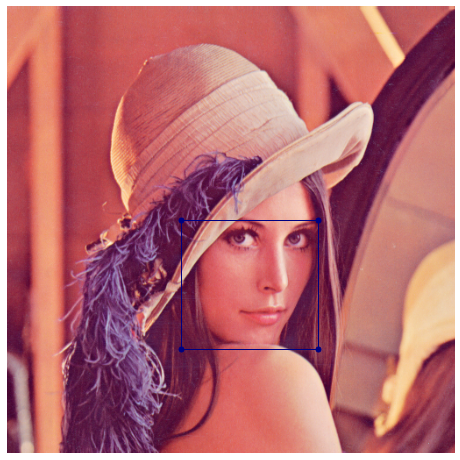

In [9]:
# Visualise the bounding box
im.view_landmarks(group='bb')

In [10]:
prediction, = sess.run(pred, feed_dict={
        # menpo stores images CHW instead of HWC that tensorflow uses
        image: im.pixels.transpose(1, 2, 0),
        # grab the upper-left and lower-down points of the bounding box.
        initial_bb: bounding_box.points[[0, 2]].ravel()}
)

## Visualize results

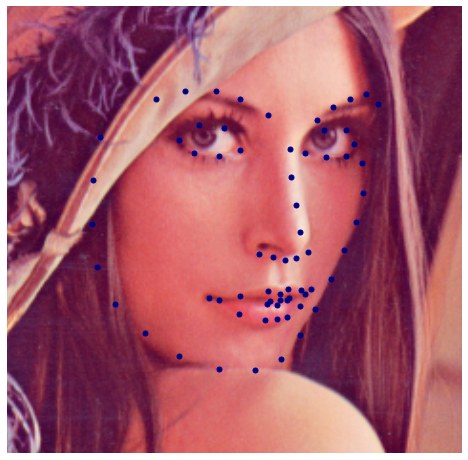

In [11]:
im.landmarks['pred'] = menpo.shape.PointCloud(prediction)

im.crop_to_landmarks_proportion(0.3, group='pred').view_landmarks(group='pred')